In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sqlite3
import zipfile

In [2]:
# Extract IMDb SQL .db file
# Extract IMDb SQL .db file

# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')

In [3]:
master = pd.read_sql("""

SELECT *
FROM sqlite_master

""",con)

In [4]:
master

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
pd.read_sql("""

SELECT *
FROM movie_ratings

""",con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
type(master)

pandas.core.frame.DataFrame

In [7]:
pd.read_sql("""

SELECT *
FROM movie_basics

""",con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
df = pd.read_sql("""
    SELECT*
    FROM movie_ratings
    LEFT JOIN movie_basics
    USING(movie_id);
    """,con)

In [9]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


### df.sort_values(by=['numvotes'], ascending=False).head(10)
### df.sort_values(by=['numvotes'], ascending=False).head(10)

In [10]:
df.sort_values(by=['numvotes'], ascending=False).head(20)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
39356,tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama"
3140,tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller"
25777,tt2015381,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy"
60518,tt1431045,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy"
63506,tt1392170,7.2,795227,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"


In [11]:
#build table with genres and vote counts from top 30 films...clean the genres to reflect Action, Adventure vs all others 

In [12]:
df = df.replace(['Action,Adventure,Comedy', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy', 'Adventure,Family,Fantasy'],
                           value = 'Action,Adventure')
df.sort_values(by=['numvotes'], ascending=False).head(10)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure"
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure"
39356,tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama"
3140,tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller"
25777,tt2015381,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure"
60518,tt1431045,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure"
63506,tt1392170,7.2,795227,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure"


In [13]:
df = df.drop(columns='movie_id')
df.drop(columns='start_year')

,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres
0,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,117.0,Romance
1,8.9,559,Borderless,Borderless,87.0,Documentary
2,6.4,20,Just Inès,Just Inès,90.0,Drama
3,4.2,50352,The Legend of Hercules,The Legend of Hercules,99.0,"Action,Adventure"
4,6.5,21,Até Onde?,Até Onde?,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...
73851,8.1,25,Caisa,Caisa,84.0,Documentary
73852,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,120.0,"Action,Animation,Sci-Fi"
73853,4.7,14,Sisters,Sisters,NaN,"Action,Drama"
73854,7.0,5,The Projectionist,The Projectionist,81.0,Documentary


In [14]:
df_runtime = df.sort_values(by=['numvotes'], ascending=False).head(20)
df_runtime

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure"
8738,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure"
39356,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama"
3140,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller"
25777,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure"
60518,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure"
63506,7.2,795227,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure"


In [32]:
df_popular = df_runtime['runtime_minutes'].mean()
df_popular

138.25

In [29]:
df_not_popular = df.sort_values(by=['numvotes'], ascending=False)[20:]

In [30]:
df_not_popular['runtime_minutes'].mean()

94.64087229672586

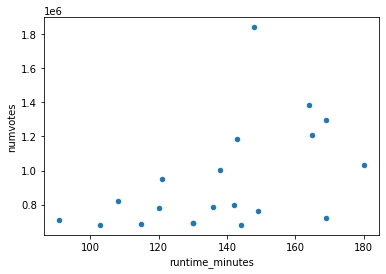

In [27]:
df_runtime.plot('runtime_minutes','numvotes', kind='scatter');

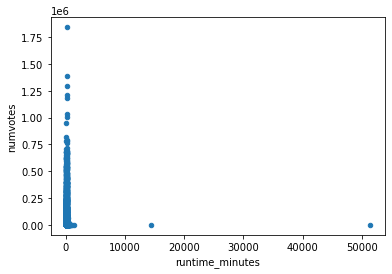

In [23]:
df.plot('runtime_minutes','numvotes', kind='scatter');

In [16]:
df.groupby(['genres']).mean()

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
Action,5.757712,336.115424,2014.271706,103.201110
"Action,Adult,Comedy",4.650000,18.000000,2014.000000,71.000000
"Action,Adventure",5.521776,71194.644891,2014.623116,102.760417
"Action,Adventure,Animation",6.562874,21380.497006,2014.676647,92.981013
"Action,Adventure,Biography",7.061905,47604.809524,2015.047619,105.500000
...,...,...,...,...
Thriller,5.704244,283.320900,2014.702251,94.880435
"Thriller,War",5.650000,1791.500000,2013.250000,88.750000
"Thriller,Western",7.150000,3322.000000,2013.250000,95.000000


In [ ]:
df.plot.bar(x='genres', y='runtime_minutes')

<AxesSubplot:xlabel='genres'>